In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\ML_Assignment\payments.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time & Date       1127 non-null   object 
 1   Currency          1127 non-null   object 
 2   Amount            1127 non-null   object 
 3   Payment Type      1127 non-null   object 
 4   Payment Provider  1127 non-null   object 
 5   City              1127 non-null   object 
 6   Order Type        1127 non-null   object 
 7   Order ID          1127 non-null   object 
 8   Name              1127 non-null   object 
 9   Quantity          1127 non-null   int64  
 10  Discount          308 non-null    object 
 11  Shipping          879 non-null    float64
 12  Status            1127 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 114.6+ KB


In [4]:
df.head()

,Time & Date,Currency,Amount,Payment Type,Payment Provider,City,Order Type,Order ID,Name,Quantity,Discount,Shipping,Status
0,"5/3/2023, 1:10:23 PM",INR,319,Single payment,Razorpay,Ernakulam,eCom Platform,11196,"Ruby (Only 1) Gloss Tube:Sample(3ml), Hibiscus...",2,NaN,80.0,Successful
1,"25/12/2022, 08:07:04 PM",INR,570,Single payment,Offline Payments,Bhopal,eCom Platform,11195,"Woody (Only 1) Gloss Tube:Sample(1ml), Bills (...",7,NaN,150.0,Successful
2,"22/12/2022, 11:41:54 PM",INR,448,Single payment,Offline Payments,Bengaluru,eCom Platform,11194,"Boujee Lip Oil, Hibiscus Lip OIl",2,NaN,150.0,Successful
3,"22/12/2022, 10:39:43 AM",INR,260,Single payment,Razorpay,bangalore,eCom Platform,11193,Dinero (Only 1) Gloss Tube:Sample(3ml),2,NaN,80.0,Successful
4,"21/11/2022, 12:46:52 PM",INR,468,Single payment,Razorpay,Namburu,eCom Platform,11192,"Brown Sugar Lip and Cheek Tint, Nudes, Cotton ...",3,NaN,80.0,Successful


EDA

In [5]:
#Missing value
df.isna().sum()

Time & Date           0
Currency              0
Amount                0
Payment Type          0
Payment Provider      0
City                  0
Order Type            0
Order ID              0
Name                  0
Quantity              0
Discount            819
Shipping            248
Status                0
dtype: int64

<Axes: >

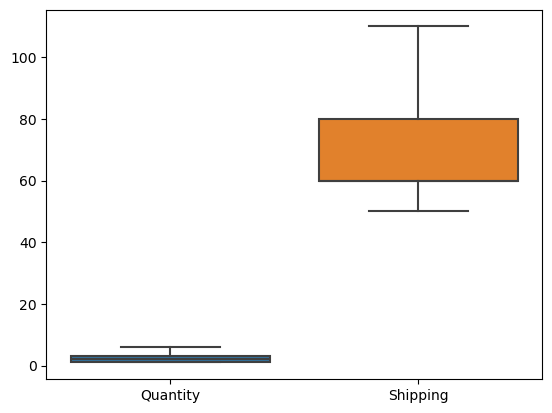

In [8]:
import seaborn as sns
sns.boxplot(data=df)

In [9]:
for i in df:
    if df[i].dtypes in ("float64", "int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

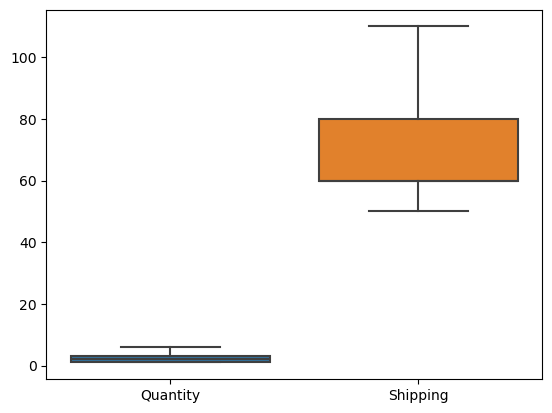

In [14]:
import seaborn as sns
sns.boxplot(data=df)

In [49]:
df = df.dropna(subset=['Amount'])

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=134)

In [19]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Amount,Time & Date,Currency,Payment Type,Payment Provider,City,Order Type,Order ID,Name,Quantity,Discount,Shipping,Status
689,270,"14/5/2021, 12:30:05 PM",INR,Single payment,Offline Payments,Sasaram,eCom Platform,58134e97-38f1-4f13-bb38-af6ff72b1cbc,Euphoria Sample,1,NaN,110.0,Successful
264,385,"22/8/2021, 08:24:26 AM",INR,Single payment,Offline Payments,Hyderabad,eCom Platform,10874,Valentina Lip and Cheek Tint,1,NaN,60.0,Successful
63,"1,520.00","17/5/2022, 02:07:27 AM",INR,Single payment,Razorpay,Mumbai,eCom Platform,11111,"Poo (Only 1) Gloss Tube:Normal Wand, Golden Berry",5,80,NaN,Successful
56,382,"17/5/2022, 09:55:34 AM",INR,Single payment,Razorpay,मुंबई,eCom Platform,11121,Bills (Only 1) Gloss Tube:Normal Wand,1,18,80.0,Successful
563,570,"10/6/2021, 3:28:29 PM",INR,Single payment,Offline Payments,Namchi,eCom Platform,5ba2895f-73a2-485f-ae5c-13cdba5a23fa,24K rose Lip Oil Gloss Select an Option:Squeez...,2,NaN,110.0,Successful


In [50]:
y = pd.to_numeric(y, errors='coerce').fillna(0)

Correlation

ValueError: could not convert string to float: '1,520.00'

ValueError: could not convert string to float: '1,520.00'

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Amount'],axis=1)
series_before = pd.series([variance_inflation_factor(X1.values, i)
                           for i in range(X1.shape[1])], indes=X1.columns)

AttributeError: module 'pandas' has no attribute 'series'

In [24]:
# Define target and features
target = 'Amount'
X = df[['Quantity', 'Shipping', 'Payment Type', 'Payment Provider', 'City', 'Order Type']]
y = df[target]

In [25]:
# Convert 'Amount' to numeric, handling any non-numeric values
y = pd.to_numeric(y, errors='coerce').fillna(0)

In [26]:
# Specify which features are categorical and which are numeric
categorical_features = ['Payment Type', 'Payment Provider', 'City', 'Order Type']
numeric_features = ['Quantity', 'Shipping']

In [53]:
# Preprocessing pipeline: OneHotEncoding for categorical features, passthrough for numeric features
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Imputation and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values with the mean
            ('passthrough', 'passthrough')  # Keep numeric values as-is after imputation
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
        ]), categorical_features)
    ]
)

In [54]:
# Build the pipeline with preprocessing and regression steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [56]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [57]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('passthrough',
                                                                   'passthrough')]),
                                                  ['Quantity', 'Shipping']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Payment Type',
                                                   'Payment Provider', 'City',
                                                   'Order Type'])])),
                ('regressor', LinearRegression())])

In [58]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [59]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 72465.2871557729
R-squared: -0.09020168659820804


A lower MSE indicates a better fit, as it means that the model's predictions are close to the actual values. However, MSE depends on the scale of Amount. If your Amount values are large, MSE will naturally be larger as well.

R^2 ranges from 0 to 1. An 𝑅^2 value closer to 1 indicates that the model explains a large portion of the variance in Amount, which implies a good fit. An 𝑅^2 value close to 0 means that the model explains very little of the variance in Amount, suggesting that the features may not be very predictive.

  